# Ejercicio 6

Explique cuál es diferencia entre localización de objetos y clasificación de imágenes. Muestre ejemplos de ello.

La clasificación de imágenes se refiere a asignar una etiqueta o categoría a una imagen, mientras que la localización de objetos implica identificar la posición precisa de uno o más objetos dentro de la imagen, además de clasificarlos. Esto implica no solo decir qué hay en la imagen, sino también marcar dónde se encuentran exactamente esos objetos.

In [1]:
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import requests
import cv2
from ultralytics import YOLO
from IPython.display import Image

requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

# Cargar el modelo pre-entrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

# Función para clasificar una imagen dada
def classify_image(image_path):
    # Cargar y preprocesar la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    # Realizar la clasificación de la imagen
    predictions = model.predict(image)
    # Decodificar las predicciones
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    # Imprimir las clases y sus probabilidades
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}. {label}: {score:.2f}")

2024-04-24 23:25:12.973944: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
image_path = '../fotos/auto.webp'
classify_image(image_path)
image_path = '../fotos/barco-embarcacion.jpg'
classify_image(image_path)
image_path = '../fotos/camion.jpeg' 
classify_image(image_path)
image_path = '../fotos/barco.jpg'
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. sports_car: 0.56
2. racer: 0.31
3. car_wheel: 0.03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1. liner: 0.62
2. container_ship: 0.14
3. drilling_platform: 0.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1. trailer_truck: 0.80
2. moving_van: 0.07
3. garbage_truck: 0.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1. liner: 0.71
2. dock: 0.03
3. container_ship: 0.03



0: 480x640 1 truck, 85.5ms
Speed: 5.2ms preprocess, 85.5ms inference, 1249.8ms postprocess per image at shape (1, 3, 480, 640)


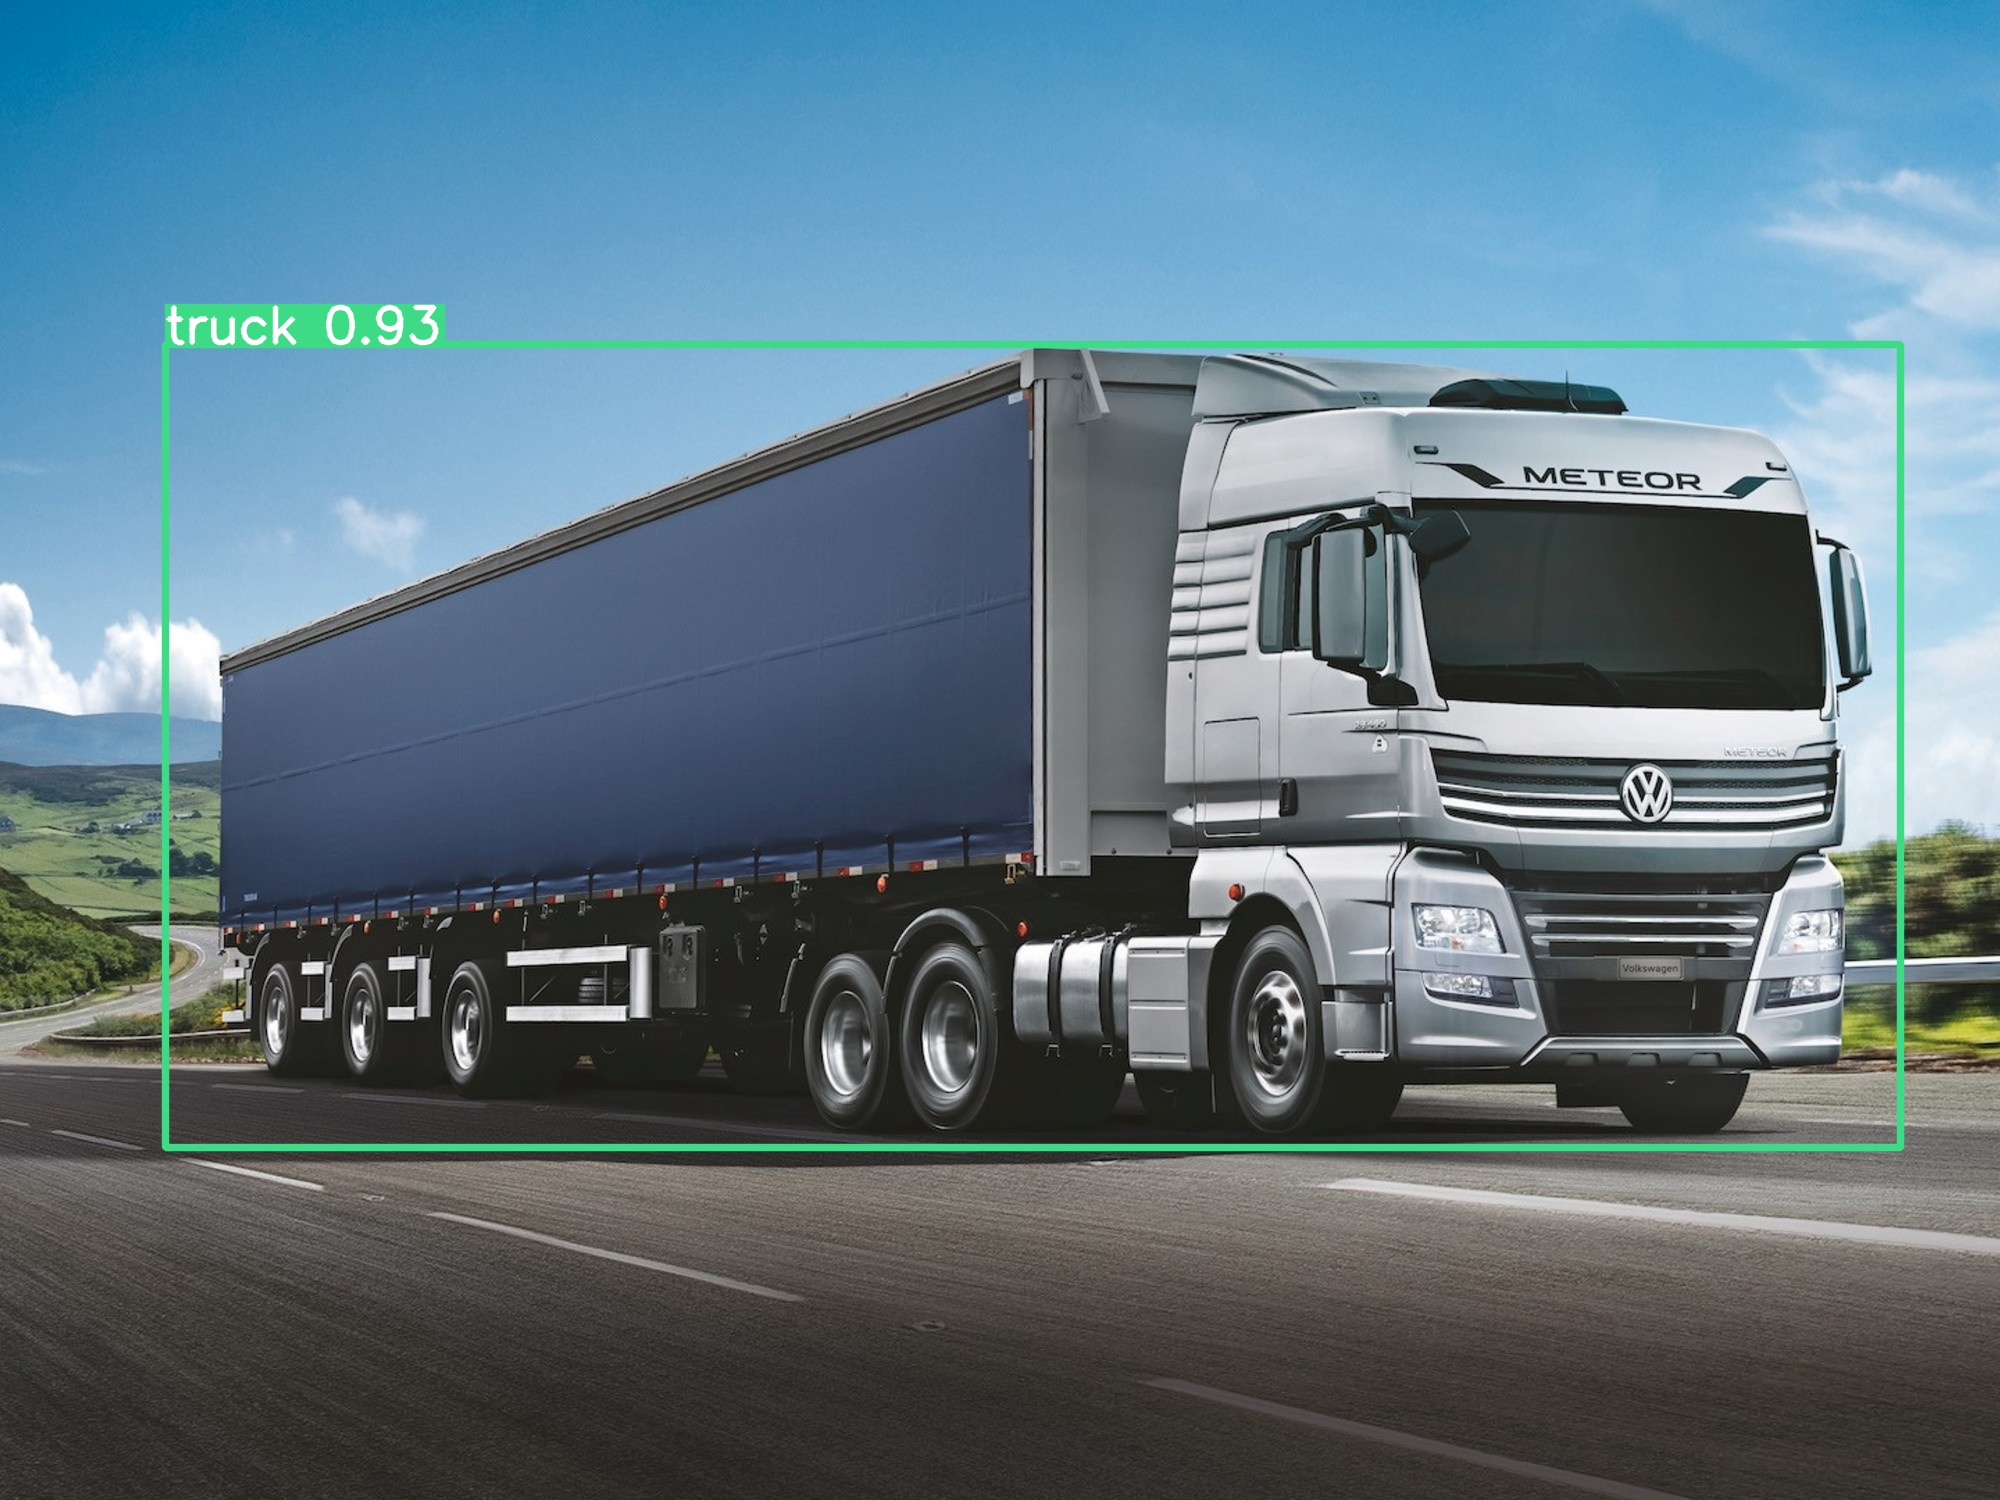

In [15]:
# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # This will automatically download the model weights

# Perform inference
source_img = cv2.imread('../fotos/camion.jpeg')
results = model(source_img)

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Guardamos el resultado en JPEG
cv2.imwrite('camion.jpeg', annotated_frame)

# Mostramos el resultado en Colab
Image('camion.jpeg')


In [16]:
for box in results[0].boxes:
    # Extrayendo los datos del tensor
    x1, y1, x2, y2, confidence, cls = box.data[0]
    # Obteniendo el nombre de la clase
    class_name = model.names[int(cls)]
    # Imprimir los resultados en un formato legible
    print(f"Clase: {class_name}, Box: ({x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}), Confianza: {confidence:.2f}")

Clase: truck, Box: (165.06, 344.35, 1900.65, 1147.36), Confianza: 0.93
